## PyTorch 基础：Tensor 和 Autograd
### 3.1 Tensor
从工程角度讲，将 Tensor 认为是一个数组，支持高效的科学计算。  
本笔记本将系统讲解 tensor 的使用。

In [1]:
from __future__ import print_function
import torch as t
t.__version__

'0.4.0'

#### 3.1.1 基础操作
好消息：tensor 的接口和 numpy 类似，学习过 numpy 的读者将对本节十分熟悉。

#### 创建 tensor
**Tensor(\*sizes)** 是新建 tensor 最复杂多变的方式。  
需要注意，使用 tensor( ) ，系统不会马上分配空间，只是会计算剩余内存是否够用，使用 tensor 时才会分配内存。

In [2]:
# 指定 tensor 的形状
a = t.Tensor(5,3)
a

tensor([[ 0.0000e+00,  4.6566e-10,  0.0000e+00],
        [ 4.6566e-10,  1.4569e-19,  6.4069e+02],
        [ 4.3066e+21,  1.1824e+22,  4.3066e+21],
        [ 6.3828e+28,  3.8016e-39,  0.0000e+00],
        [ 0.0000e+00,  4.6566e-10, -4.8637e+11]])

In [4]:
# 用 list 的数据新建 tensor
b = t.Tensor([[1,2,3],[4,5,6]])
b

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.]])

In [5]:
# 把 tensor 转换成 list
b.tolist()

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]

In [6]:
# torch.shape 和 torch.size() 等价
b.size()
b.shape

torch.Size([2, 3])

In [8]:
# b 里的元素总个数
b.numel()

6

In [9]:
b.shape

其余 numpy 里常用的命令也可以用来新建 tensor：  
ones  
eyes  
zeros  
arange  
linspace  
randn  
normal  
randperm  

#### 常用操作
调形状：view 和 resize  
添加或减少维度：squeeze 和 unsqueeze


In [21]:
a = t.arange(0,6)
b = a.view(-1,3) # -1 维度将自动计算长度，通俗地说就是自适应
b

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])

In [22]:
b.unsqueeze(1)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]]])

In [23]:
b.unsqueeze(-2)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]]])

In [19]:
c = b.view(1,1,1,2,3)
c

tensor([[[[[ 0.,  1.,  2.],
           [ 3.,  4.,  5.]]]]])

In [24]:
c.squeeze() # 去掉所有长度为1的维度

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.]])

In [25]:
# 改变原始元素，view 之后结果也会随之改变
a[1] = 100
b

tensor([[   0.,  100.,    2.],
        [   3.,    4.,    5.]])

In [27]:
b.resize_(1,3)

tensor([[   0.,  100.,    2.]])

In [28]:
b.resize_(3,3)

tensor([[ 0.0000e+00,  1.0000e+02,  2.0000e+00],
        [ 3.0000e+00,  4.0000e+00,  5.0000e+00],
        [-4.8381e+11,  1.8654e-40,  0.0000e+00]])

#### 索引操作

In [30]:
a = t.randn(3,4)
a

tensor([[-0.0850,  0.5930,  0.0355, -2.3738],
        [ 0.5952,  2.3171,  0.1350,  0.5783],
        [-0.2120,  0.7751,  1.7026,  0.7697]])

In [31]:
a[-1][-1]

tensor(0.7697)

In [32]:
a[0,-1]

tensor(-2.3738)

In [39]:
a[:-1]

tensor([[-0.0850,  0.5930,  0.0355, -2.3738],
        [ 0.5952,  2.3171,  0.1350,  0.5783]])

In [34]:
a[2:]

tensor([[-0.2120,  0.7751,  1.7026,  0.7697]])

In [44]:
a[:2,0:2] # 前两行，第0-1列

tensor([[-0.0850,  0.5930],
        [ 0.5952,  2.3171]])

In [50]:
a[:1, :2]

tensor([[-0.0850,  0.5930]])

In [51]:
a[a>1]

tensor([ 2.3171,  1.7026])

In [62]:
a = t.arange(0,25).view(5,5)
a

tensor([[  0.,   1.,   2.,   3.,   4.],
        [  5.,   6.,   7.,   8.,   9.],
        [ 10.,  11.,  12.,  13.,  14.],
        [ 15.,  16.,  17.,  18.,  19.],
        [ 20.,  21.,  22.,  23.,  24.]])

In [65]:
index = t.LongTensor([[0,1,2,3,4],[4,3,2,1,0]]).t() # 提取两个对角线元素
b = a.gather(1, index)
b

tensor([[  0.,   4.],
        [  6.,   8.],
        [ 12.,  12.],
        [ 18.,  16.],
        [ 24.,  20.]])

In [64]:
c = t.zeros(5,5)
c.scatter_(1,index, b) # 把两个对角线元素放回指定位置

tensor([[  0.,   0.,   0.,   0.,   4.],
        [  0.,   6.,   0.,   8.,   0.],
        [  0.,   0.,  12.,   0.,   0.],
        [  0.,  16.,   0.,  18.,   0.],
        [ 20.,   0.,   0.,   0.,  24.]])

#### 高级索引

In [67]:
x = t.arange(0,27).view(3,3,3)
x

tensor([[[  0.,   1.,   2.],
         [  3.,   4.,   5.],
         [  6.,   7.,   8.]],

        [[  9.,  10.,  11.],
         [ 12.,  13.,  14.],
         [ 15.,  16.,  17.]],

        [[ 18.,  19.,  20.],
         [ 21.,  22.,  23.],
         [ 24.,  25.,  26.]]])

In [68]:
x[[2,1,0],0,1] # =[2,0,1],[1,0,1],[0,0,1]

tensor([ 19.,  10.,   1.])

In [71]:
x[[0,2],...] # = x[0],x[2]

tensor([[[  0.,   1.,   2.],
         [  3.,   4.,   5.],
         [  6.,   7.,   8.]],

        [[ 18.,  19.,  20.],
         [ 21.,  22.,  23.],
         [ 24.,  25.,  26.]]])

#### tensor 类型

In [77]:
t.set_default_tensor_type('torch.FloatTensor')

In [78]:
a = t.Tensor(2,3)
a

tensor([[ 0.0000e+00,  4.6566e-10, -4.8400e+11],
        [-3.6902e+19, -4.8318e+11,  2.0005e+00]])

#### 逐元素操作 element-wise
结果形状不变

In [84]:
a = t.arange(0,9).view(3,3)
t.cos(a)

tensor([[ 1.0000,  0.5403, -0.4161],
        [-0.9900, -0.6536,  0.2837],
        [ 0.9602,  0.7539, -0.1455]])

In [85]:
a % 3

tensor([[ 0.,  1.,  2.],
        [ 0.,  1.,  2.],
        [ 0.,  1.,  2.]])

In [88]:
a ** 2 # = t.pow(a,2)

tensor([[  0.,   1.,   4.],
        [  9.,  16.,  25.],
        [ 36.,  49.,  64.]])

In [91]:
print(a)
t.clamp(a,min=1,max=5) # 逐元素截断操作

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.]])


tensor([[ 1.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 5.,  5.,  5.]])

#### 归并操作
结果尺寸变小

In [98]:
b = t.ones(2,3)
print(b.sum(dim = 0).shape)
print(b.sum(dim = 0, keepdim = True).shape)

torch.Size([3])
torch.Size([1, 3])


#### 比较操作

In [100]:
a = t.linspace(0,15,6).view(2,3)
a

tensor([[  0.,   3.,   6.],
        [  9.,  12.,  15.]])

In [102]:
b = t.linspace(15,0,6).view(2,3)
b

tensor([[ 15.,  12.,   9.],
        [  6.,   3.,   0.]])

In [103]:
t.max(a,b)

tensor([[ 15.,  12.,   9.],
        [  9.,  12.,  15.]])

#### 线性代数

### 3.1.2 Tensor 和 numpy
两者可以互相转化。

In [106]:
import numpy as np
a = np.ones([2,3], dtype = np.float32)
a

array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [109]:
b = t.from_numpy(a)
b

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [112]:
b = t.Tensor(a)
b

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [121]:
a = np.ones([2,3])
a

array([[1., 1., 1.],
       [1., 1., 1.]])

In [122]:
b = t.Tensor(a)
c = t.from_numpy(a)
b

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [123]:
a[0,1] = 100 # a 的类型和 b 不同，所以两者不共享内存
b

tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])

In [124]:
c # c 和 a 共享内存

tensor([[   1.,  100.,    1.],
        [   1.,    1.,    1.]], dtype=torch.float64)

#### 广播法则
* 所有输入数组向 shape 最长的数组看齐，不足部分在前面加1补齐
* 两个数组要么在某个维度长度一致，要么其中一个在某个维度长度为1，否则不能计算
* 当输入数组某一维度长度为1时，计算沿此维度复制扩充成一样的形状  

手动实现：  
* unsqueeze 或者 view，实现法则1
* expand 或者 expand_as，实现法则3

In [125]:
a = t.ones(3,2)
b = t.zeros(2,3,1)

In [126]:
a.unsqueeze(0).expand(2,3,2) + b.expand(2,3,2)

tensor([[[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]],

        [[ 1.,  1.],
         [ 1.,  1.],
         [ 1.,  1.]]])

### 3.1.3 内部结构
### 3.1.4 向量化
这两部分略过。参见 chenyuntc 的 [github](https://github.com/chenyuntc/pytorch-book/master/chapter3-Tensor和autograd/Tensor.ipynb)

### 3.1.5 小试牛刀——线性回归

#### 准备数据

In [154]:
import torch as t
import matplotlib.pyplot as plt
from IPython import display

# 设置随机数种子
t.manual_seed(1000)

def get_fake_data(batch_size = 20):
    x = t.randn(batch_size,1) * 10
    y = 2 * x + 3 + t.randn(batch_size,1) * 10 # true w = 2, b = 3
    return x,y

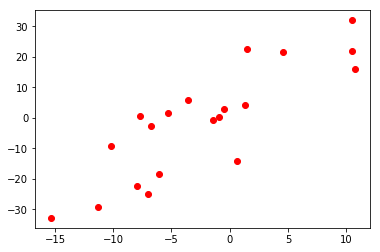

In [155]:
x,y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy(), color = 'r')

#### 定义损失，计算梯度，更新参数

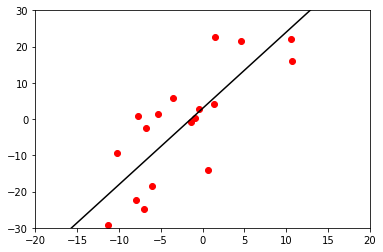

epoch = 110


In [ ]:
# 随机初始化参数
w = t.randn(1,1)
b = t.zeros(1,1)

# 学习率和轮数
lr = 0.001
epochs = 2000

# 开始训练
for ii in range(epochs):
    
    # 计算 loss
    y_predicted = x.mm(w) + b.expand_as(y)
    loss = 0.5 * (y - y_predicted) ** 2
    loss = loss.sum()
    
    # 手动计算矩阵和向量求导，进而得到 w 和 b 的偏导数，也就是梯度
    dloss = 1
    dy_predicted = y_predicted - y
    dw = x.t().mm(dy_predicted) # 手动计算可以得到
    db = dy_predicted.sum()
    
    # 更新参数
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    # 画图
    if ii % 2 == 1 and ii <= 200:
        print('epoch = {}'.format(ii+1))
        
        # 直观显示 w 和 b 的更新过程，显示回归线越来越接近最优
        # 抹去输出，重新画图
        display.clear_output(wait = True)
        
        # 生成用于画回归线的点
        xd = t.arange(-20,20).view(-1,1)
        yd = xd.mm(w) + b.expand_as(xd)
        
        # 画出回归线
        plt.plot(xd.numpy(),yd.numpy(),color = 'k')
        
        # 画出实际要回归的数据
        plt.scatter(x.numpy(),y.numpy(),color = 'r')
        
        plt.xlim(-20,20)
        plt.ylim(-30,30)
        plt.show()
        plt.pause(0.1)

print('training is completed.')
print('predicted: w = {:03f}, b = {:03f}'.format(w.squeeze().numpy(), b.squeeze().numpy()))
print('true:      w = {:03f}, b = {:03f}'.format(2,3))